Load the `ISLR2` and `tidyverse` packages.

In [1]:
library('ISLR2')
library('tidyverse')
library('recipes')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step




`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
data <-  Auto
data %>% glimpse()

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

NULL

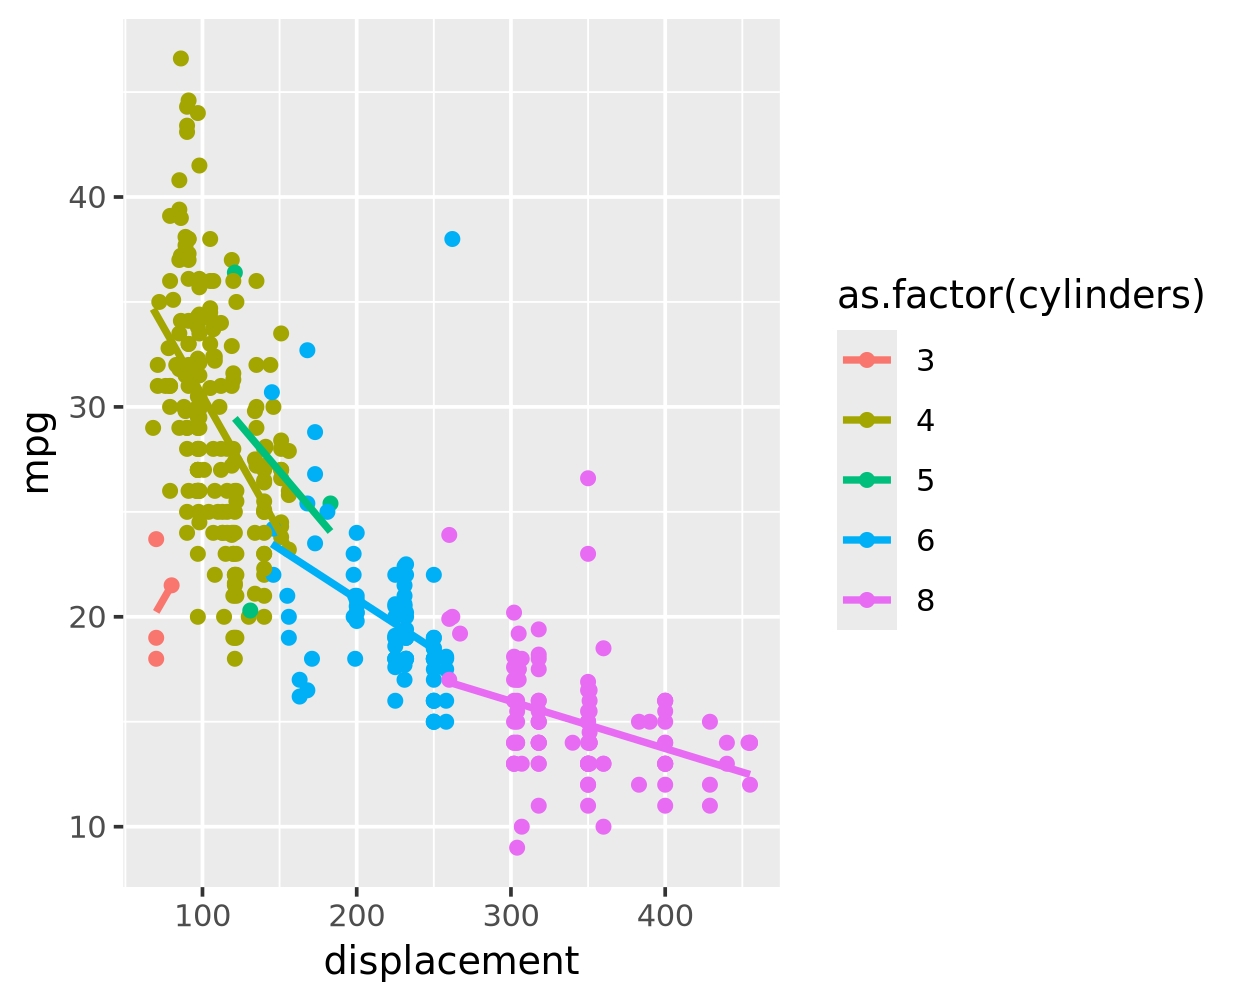

In [3]:
data %>% ggplot(aes(x = displacement, y = mpg, color = as.factor(cylinders))) +
         geom_point()+
         geom_smooth(formula = y ~ x,method = "lm", se = FALSE)
         labs(x = "Displacement", y = "MPG",
         title = "MPG vs. Displacement")+
         scale_color_discrete(name = "Cylinders")

❓Does the relationship of `mpg` to `displacement` look linear?


Yes, for each category of the displacement, there is a negative relationship between mpg and displacement, that menas higher displacemnt has a lower mpg and cars with the lower displacement have a higher mpg.  


In [4]:
mpg_recipe <- recipe(mpg ~ displacement + cylinders, data = data) %>%
  
step_poly(displacement, degree = 2) %>%
step_mutate(cyl_cat = factor(cylinders)) %>%
step_dummy(cyl_cat) %>%
step_rm(cylinders)

mpg_prepared <- mpg_recipe %>%
  prep(training = data)

print(mpg_prepared)

# Fit a linear regression model
mpg_model <- lm(mpg ~ ., data = bake(mpg_prepared, new_data = NULL))

# View the model summary
summary(mpg_model)




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Training information 

Training data contained 392 data points and no incomplete rows.



── Operations 

• Orthogonal polynomials on: displacement | Trained

• Variable mutation for: ~factor(cylinders) | Trained

• Dummy variables from: cyl_cat | Trained

• Variables removed: cylinders | Trained




Call:
lm(formula = mpg ~ ., data = bake(mpg_prepared, new_data = NULL))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6832  -2.4299  -0.3269   2.0961  21.0167 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)            9.804      2.348   4.176 3.67e-05 ***
displacement_poly_1 -139.629     14.547  -9.599  < 2e-16 ***
displacement_poly_2   36.129      5.729   6.306 7.85e-10 ***
cyl_cat_X4            13.193      2.166   6.092 2.71e-09 ***
cyl_cat_X5            15.038      3.309   4.544 7.38e-06 ***
cyl_cat_X6            13.952      2.592   5.382 1.29e-07 ***
cyl_cat_X8            14.749      2.954   4.993 9.02e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.187 on 385 degrees of freedom
Multiple R-squared:  0.7166,	Adjusted R-squared:  0.7122 
F-statistic: 162.3 on 6 and 385 DF,  p-value: < 2.2e-16


Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

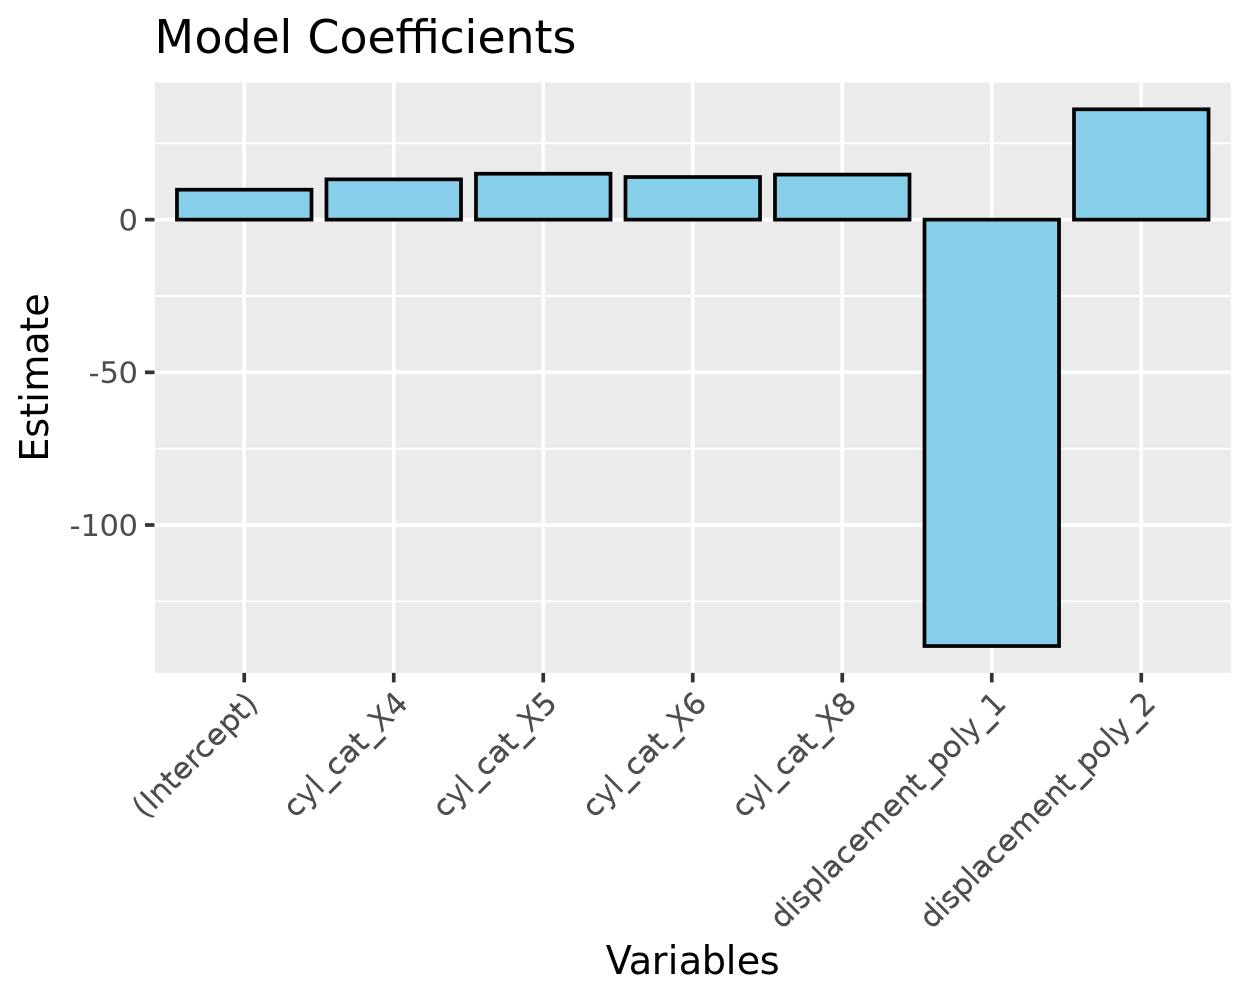

In [5]:
# coefficients from the model
coefficients_df <- summary(mpg_model)$coefficients

#  data frame for plotting
coefficients_df <- as.data.frame(coefficients_df)

# row names to a column
coefficients_df$Variables <- rownames(coefficients_df)
rownames(coefficients_df) <- NULL

# Plot the coefficients
ggplot(coefficients_df, aes(x = Variables, y = Estimate)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Model Coefficients",
       x = "Variables",
       y = "Estimate") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


New names:
• `` -> `...1`


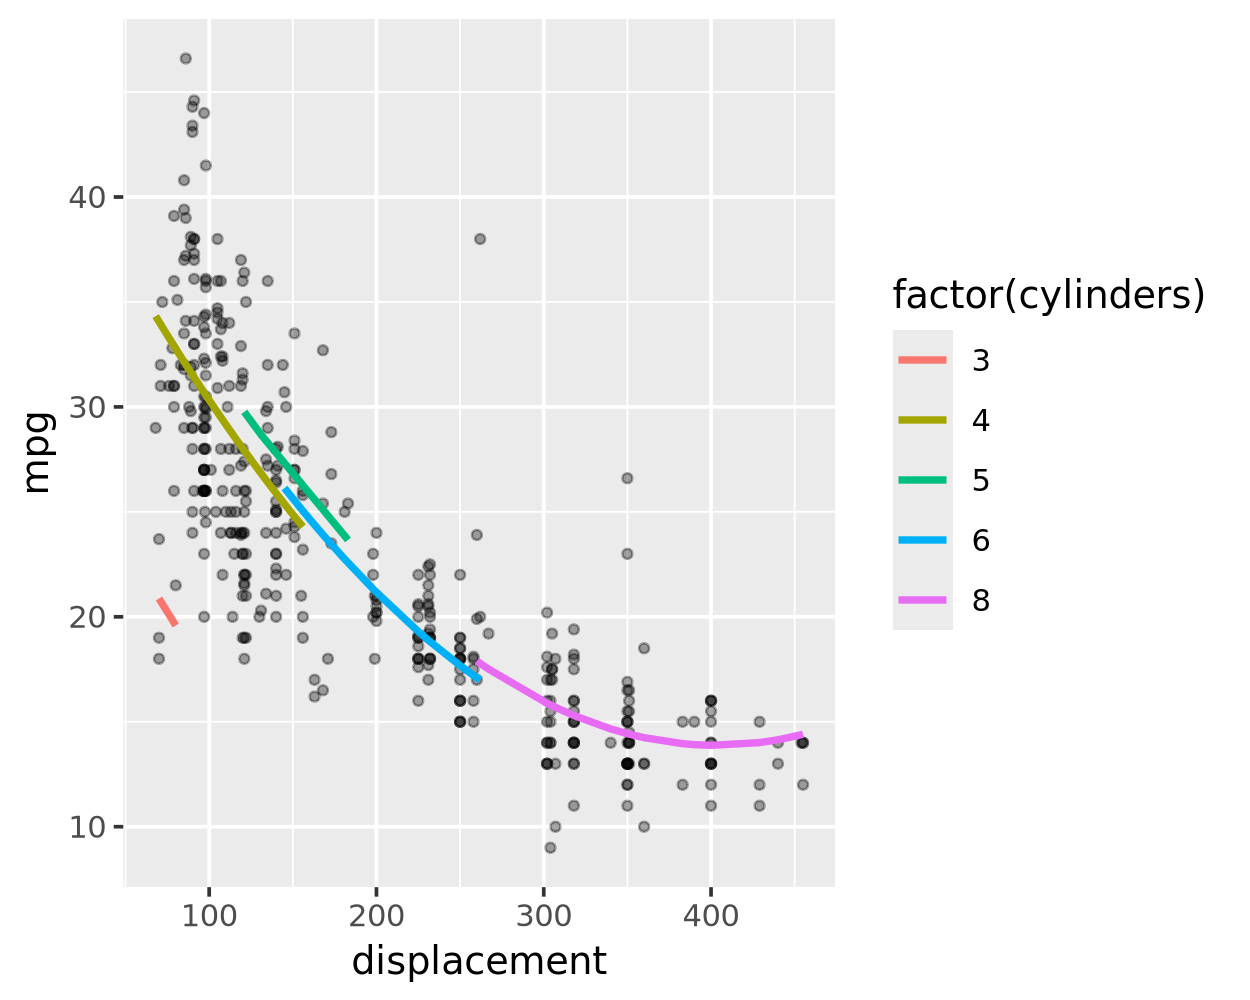

In [6]:
predict(mpg_model, mpg_prepared |> juice()) %>%
bind_cols(data) %>% rename(.pred = `...1`) %>% 
ggplot(aes(x = displacement, y = mpg)) +
geom_point(size = 1, alpha = 0.35) +
geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)